# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [ ]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [ ]:
X.head()

In [ ]:
y.head()

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [11]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Criar os DataFrames X e y diretamente dos dados carregados
X = pd.DataFrame(data)
y = pd.DataFrame(target, columns=['MEDV'])






### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

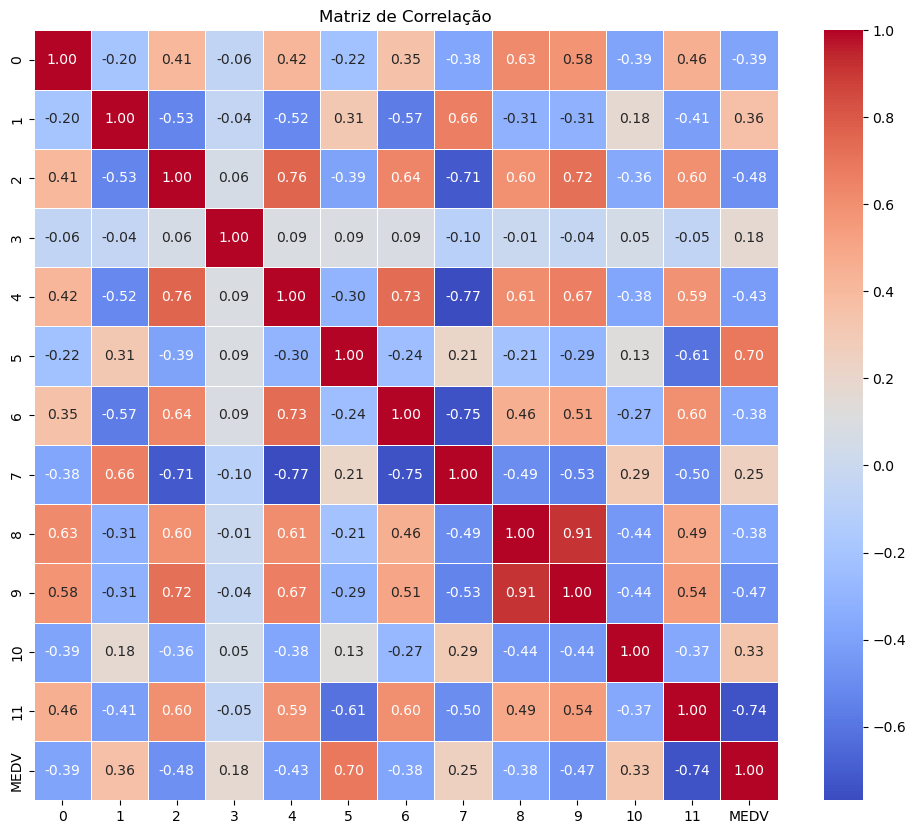

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar X e y para criar um único DataFrame
df_boston = pd.concat([X, y], axis=1)

# Calcular a matriz de correlação
correlation_matrix = df_boston.corr()

# Plotar a matriz de correlação usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


### 3. Separe os dados em validação e teste

In [13]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir o número de amostras em cada conjunto
print("Número de amostras no conjunto de treinamento:", len(X_train))
print("Número de amostras no conjunto de teste:", len(X_test))


Número de amostras no conjunto de treinamento: 404
Número de amostras no conjunto de teste: 102


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Inicializar e treinar a árvore com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_depth_8 = tree_depth_8.predict(X_test)

# Calcular o erro médio quadrático
mse_depth_8 = mean_squared_error(y_test, y_pred_depth_8)
print("Erro Médio Quadrático para a árvore com profundidade máxima 8:", mse_depth_8)

# Inicializar e treinar a árvore com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_depth_2 = tree_depth_2.predict(X_test)

# Calcular o erro médio quadrático
mse_depth_2 = mean_squared_error(y_test, y_pred_depth_2)
print("Erro Médio Quadrático para a árvore com profundidade máxima 2:", mse_depth_2)


Erro Médio Quadrático para a árvore com profundidade máxima 8: 19.544678123717333
Erro Médio Quadrático para a árvore com profundidade máxima 2: 25.9931908959712


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [15]:
from sklearn.metrics import mean_squared_error

# Calcular o MSE para a árvore com profundidade máxima 8 na base de treinamento
mse_train_depth_8 = mean_squared_error(y_train, tree_depth_8.predict(X_train))
print("MSE na base de treinamento para a árvore com profundidade máxima 8:", mse_train_depth_8)

# Calcular o MSE para a árvore com profundidade máxima 8 na base de testes
mse_test_depth_8 = mean_squared_error(y_test, y_pred_depth_8)
print("MSE na base de testes para a árvore com profundidade máxima 8:", mse_test_depth_8)

# Calcular o MSE para a árvore com profundidade máxima 2 na base de treinamento
mse_train_depth_2 = mean_squared_error(y_train, tree_depth_2.predict(X_train))
print("MSE na base de treinamento para a árvore com profundidade máxima 2:", mse_train_depth_2)

# Calcular o MSE para a árvore com profundidade máxima 2 na base de testes
mse_test_depth_2 = mean_squared_error(y_test, y_pred_depth_2)
print("MSE na base de testes para a árvore com profundidade máxima 2:", mse_test_depth_2)


MSE na base de treinamento para a árvore com profundidade máxima 8: 2.0824209505424656
MSE na base de testes para a árvore com profundidade máxima 8: 19.544678123717333
MSE na base de treinamento para a árvore com profundidade máxima 2: 25.654637281631615
MSE na base de testes para a árvore com profundidade máxima 2: 25.9931908959712


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade máxima 2 é mais adequada, apresentando um MSE um pouco maior na base de treinamento, mas generalizando melhor para a base de testes, indicando menor overfittin

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

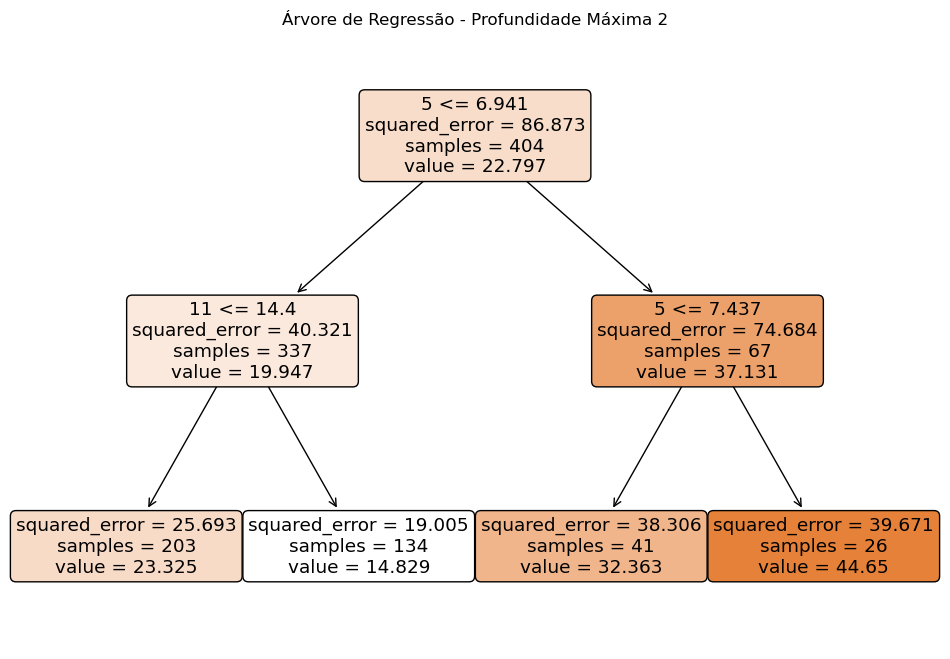

In [18]:
import matplotlib.pyplot as plt

# Treinamento da árvore com profundidade máxima 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2)
tree_depth_2.fit(X_train, y_train)

# Visualização gráfica da árvore
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_depth_2, feature_names=list(X.columns), filled=True, rounded=True)
plt.title('Árvore de Regressão - Profundidade Máxima 2')
plt.show()

